# 라이브러리 설치

In [1]:
pip install mglearn # scipy scikit-learn pillow

     |████████████████████████████████| 542kB 4.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=d06160fb2b063b5caea9f5f994d28ae0f49826e40df06fa04d044d3986141155
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [2]:
import sklearn
import scipy as sp
import mglearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import matplotlib.font_manager as fm
# 시각화 시 한글 폰트 나오도록
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 134448 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


-----
-----

# 1. Forge 데이터셋

### 1-1. 데이터셋 생성 및 시각화

In [0]:
# forge 데이터셋 생성
X_forge, y_forge = mglearn.datasets.make_forge()

In [4]:
# (레코드, 피처) 수
X_forge.shape

(26, 2)

Text(0.5, 0, '첫 번째 특성')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


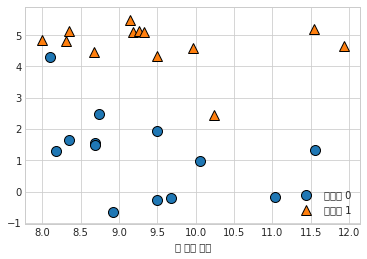

In [5]:
mglearn.discrete_scatter(X_forge[:, 0], X_forge[:, 1], y_forge)
plt.legend(['클래스 0', '클래스 1'], loc = 4)
plt.xlabel('첫 번째 특성')

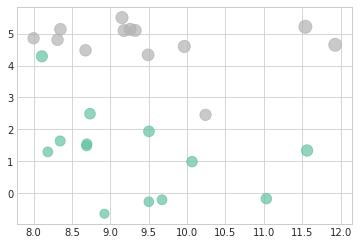

In [6]:
# 시각화 ver2
plt.scatter(X_forge[:, 0], X_forge[:, 1], s=X_forge[:,1]*10 + X_forge[:,0]*10, c=y_forge, cmap='Set2', alpha=.7)
plt.show()

### 1-2. kNN 알고리즘

* kNN알고리즘
    * 새로운 레코드에 대해 가장 가까운 훈련 데이터 포인트로 분류
    * 근접점의 수가 늘어나면, 가장 많이 근접한 이웃의 수로 분류

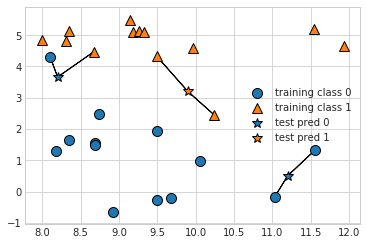

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

In [0]:
# 폴드아웃 샘플 생성
from sklearn.model_selection import train_test_split
X_forge, y_forge = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X_forge, y_forge, random_state=0)

In [0]:
# kNN분류 모듈 임포트, 객체 생성
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [10]:
# 분류 모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
# predict 매서드로 테스트 데이터 호출하여 예측
print('테스트 세트 예측: {}'.format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [12]:
# 정확도 측정
print('테스트 세트 예측 정확도: {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 예측 정확도: 0.86


### 1-3. kNeighborsClassifier 분석

* 이웃의 수에 따라 **결정 경계** *(decision boundary)*가 바뀜
* 이웃의 수를 늘릴수록 결정 경계는 부드러워짐
    * 이웃을 적게 사용하면 복잡도가 높아짐
    * 이웃을 많이 사용하면 복잡도가 낮아짐
    * 훈련 데이터 전체 개수를 이웃 수로 정하면, 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스로 예측
    

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


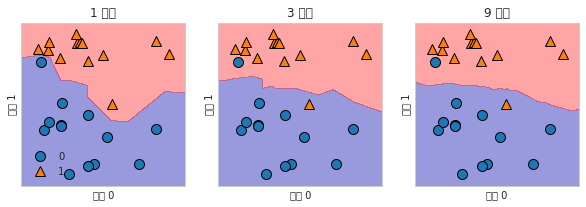

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_forge, y_forge)
    mglearn.plots.plot_2d_separator(clf, X_forge, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X_forge[:, 0], X_forge[:, 1], y_forge, ax=ax)
    ax.set_title('{} 이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)


-----
-----

### 1-4. Logistic Regression, Support Vector Machine

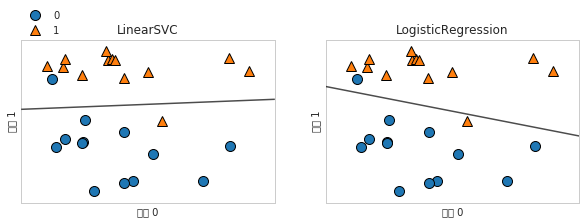

In [14]:
# 모델 생성
## 로지스틱회귀, SVM 모델 모두 하나씩은 잘못 분류했음
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X_forge, y_forge = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X_forge, y_forge)
    mglearn.plots.plot_2d_separator(clf, X_forge, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X_forge[:, 0], X_forge[:, 1], y_forge, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=[0,1])
plt.show()

* C값이 높아지면 규제가 감소
* C값이 낮아지면 데이터 포인트 중 다수에 맞추려함
    * 왼쪽 그림은 수평에 가까우며 데이터 2개 잘못 분류
    * 가운데 그림은 규제가 감소하며 기울기가 데이터에 가까워짐
    * 오른쪽 그림은 피쳐0을 잘 반영하였지만 전반적인 배치를 이해하지 못함
    * C값과 과대적합을 유의해서 보기

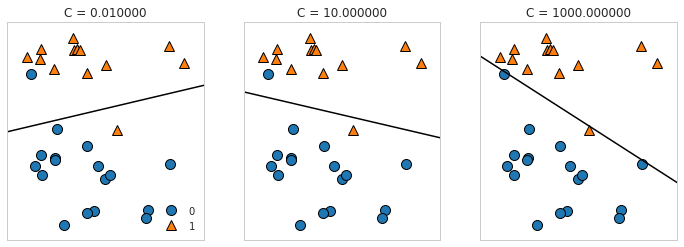

In [15]:
# L2 규제, 파라미터 C에 따른 결정 경계 변화
mglearn.plots.plot_linear_svc_regularization()

### 1-5. SVM

Text(0, 0.5, '특성 1')

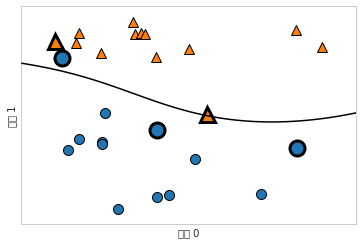

In [16]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=.1).fit(X,y)

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 서포트 벡트
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

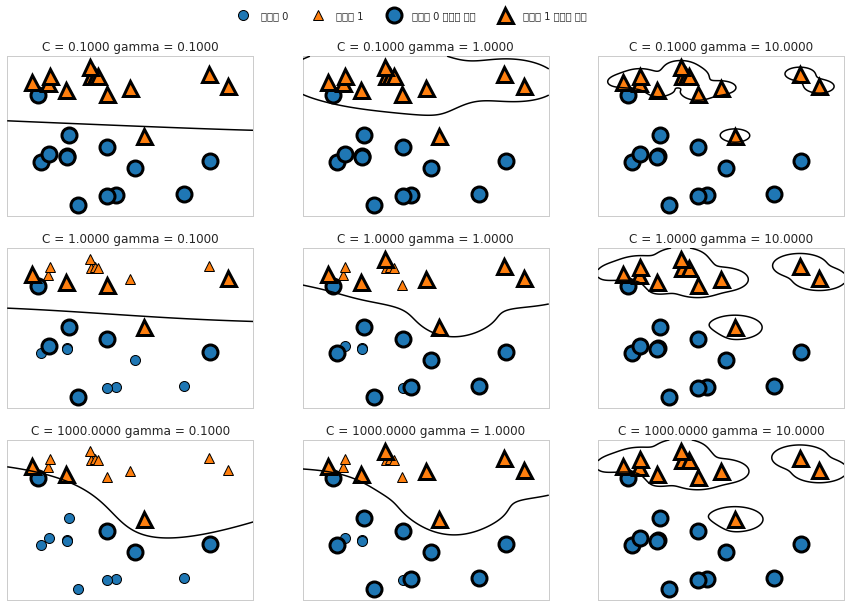

In [17]:
# SVM 매개변수 살펴보기!
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0,0].legend(['클래스 0', '클래스 1', '클래스 0 서포트 벡터', '클래스 1 서포트 벡터'], ncol = 4, loc=(.9, 1.2))

# 2. wave 데이터셋

### 2-1. 데이터셋 생성 및 시각화

In [0]:
# 데이터셋 생성
X_wave, y_wave = mglearn.datasets.make_wave(n_samples=40)

In [19]:
# (레코드, 피처) 수
X_wave.shape

(40, 1)

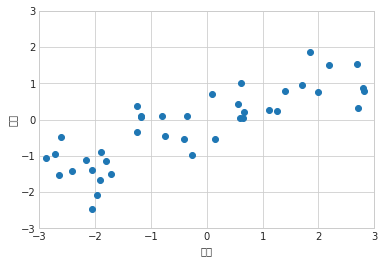

In [20]:
# 시각화
plt.scatter(X_wave, y_wave,  marker='o')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타깃')
plt.show()

### 2-2. k-최근접 이웃 회귀

* x축에 피처 위치, 그 중 가장 가까운 이웃으로 회귀
    * 하나의 이웃 사용 시, 가장 가까운 이웃 사용
    * 여러 개의 최근접 이웃 사용 시, 이웃 간 평균이 예측됨
    

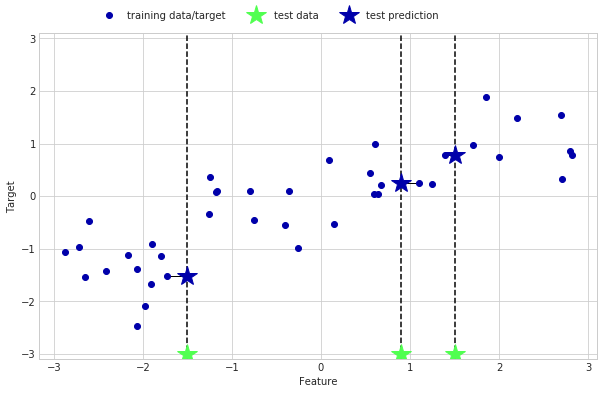

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

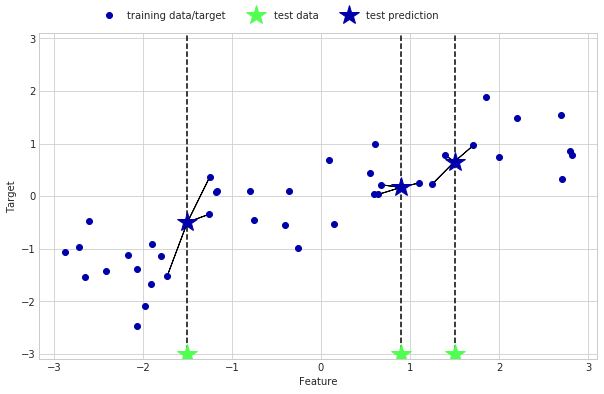

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [0]:
# 임포트 및 객체 불러오기
from sklearn.neighbors import KNeighborsRegressor
X_wave, y_wave = mglearn.datasets.make_wave(n_samples=40)

In [24]:
# 폴드 아웃 샘플 생성
X_train, X_test, y_train, y_test = train_test_split(X_wave, y_wave, random_state=0)

# 이웃 수 3인 모델 객체 생성
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [25]:
# 테스트 세트 예측
print('테스트 세트 예측:\n{}'.format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [26]:
# 모델 테스트
print('테스트 세트 r스퀘어: {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 r스퀘어: 0.83


* 이웃 수가 모델의 일반화에 크게 관여
    * 이웃이 적으면 훈련 데이터는 잘 예측, 일반화는 잘 안됨
    * 이웃이 많으면 훈련 데이터와는 잘 맞지 않을 수 있지만, 안정적인 예측 가능


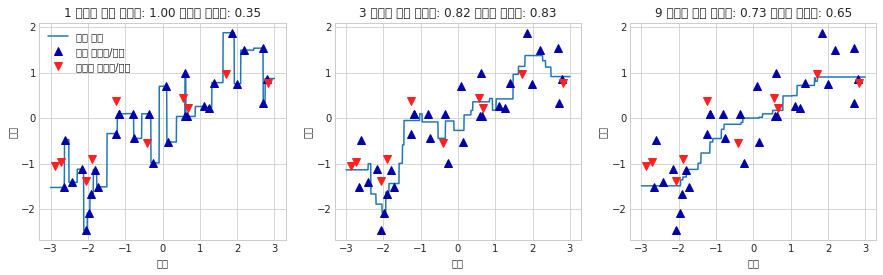

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title('{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('특성')
    ax.set_ylabel('타깃')
axes[0].legend(['모델 예측', '훈련 데이터/타깃', '테스트 데이터/타깃'], loc=2)

### 2-3 회귀 선형 모델

w[0]: 0.393906  b: -0.031804


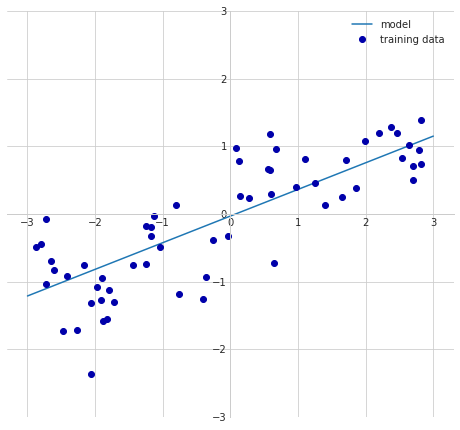

In [28]:
mglearn.plots.plot_linear_regression_wave()

In [0]:
# 객체 임포트 및 모델 생성
from sklearn.linear_model import LinearRegression
X_wave, y_wave = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X_wave, y_wave, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [30]:
# 모델의 w, b 출력
## 싸이킷런에서 데이터에서 유도된 속성은 항상 끝에 밑줄을 붙임.
## 사용자가 지정한 매개변수와 구분하기 위함
print('[w(weight), 가중치, 계수]: {} \n[편향, 절편, 파라미터(b)]: {}'.format( lr.coef_,lr.intercept_))

[w(weight), 가중치, 계수]: [0.39390555] 
[편향, 절편, 파라미터(b)]: -0.031804343026759746


In [31]:
# 훈련 세트 점수 및 테스트 세트 점수 출력
## R스퀘어 값이 0.66으로 그리 좋은 점수는 아님
## 추가로, 훈련 세트와 테스트 세트 점수가 비슷
## 즉, 과소적합 상태
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


# 3. 위스콘신 유방암 데이터셋
* 조직 데이터를 기반으로 종양의 악성 여부 예측

### 3-1. 데이터셋 생성

In [32]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [33]:
# data 레코드, 피처 수 확인
cancer['data'].shape

(569, 30)

In [34]:
# target의 값 확인
np.unique(cancer['target'])

array([0, 1])

In [35]:
# 각 피처들의 이름 조회
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [36]:
# 클래스별 샘플 수
print('클래스별 샘플 수:\n{}'.format({n: v for n, v in zip(cancer['target_names'], np.bincount(cancer['target']))}))

클래스별 샘플 수:
{'malignant': 212, 'benign': 357}


### 3-2. Logistic Regression

In [37]:
# 훈련 세트와 테스트 세트 성능 매우 비슷, 과소 적합인 것으로 보임
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(logreg.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.96
테스트 세트 점수: 0.95


In [38]:
# C값 100으로 증가
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(logreg100.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.97


In [39]:
# C값 0.1로 감소
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


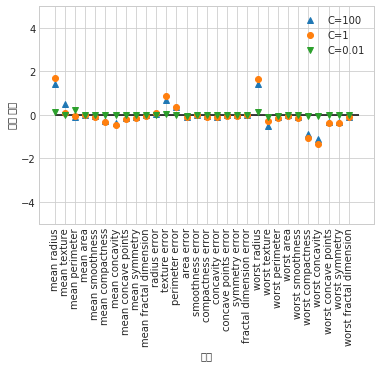

In [40]:
# C값에 따른 계수 변화 시각화
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer['data'].shape[1]), cancer['feature_names'], rotation=90)
plt.hlines(0, 0, cancer['data'].shape[1])
plt.ylim(-5, 5)
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.legend()

### 3-3. Decision Tree (결정 트리)

In [41]:
# 결정 트리 깊이, 리프 수 등을 제한하지 않아 과대적합됨

from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [42]:
# 사전 가지치기 max_depth=4 로 제한
## 훈련 세트 정확도 다소 떨어졌지만, 테스트 정확도는 올라감

tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train, y_train)
print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [0]:
# export_graphviz를 통한 트리 모델 시각화
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['악성', '양성'], feature_names=cancer['feature_names'], impurity=False, filled=True)

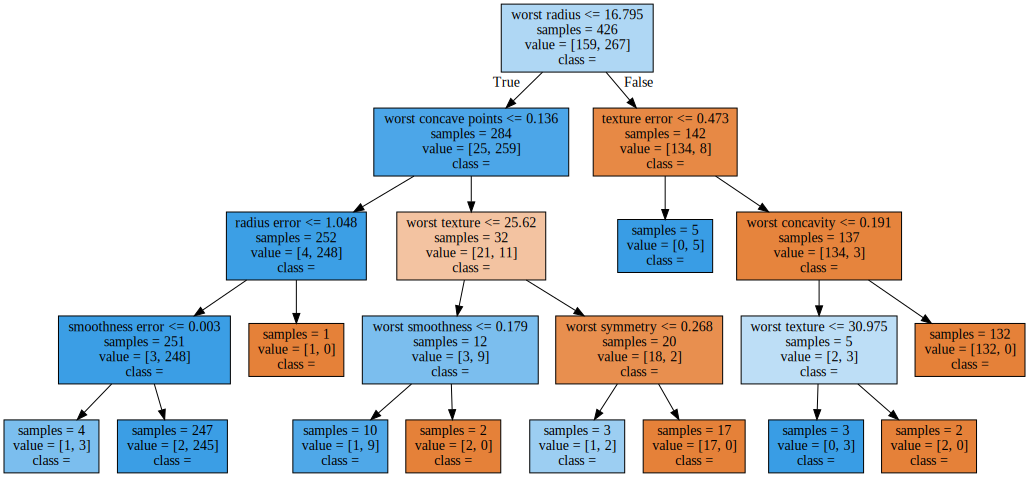

In [44]:
# graphviz 모듈 임포트, 시각화
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [45]:
# 특성 중요도 출력
print('특성 중요도: \n{}'.format(tree.feature_importances_))

특성 중요도: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


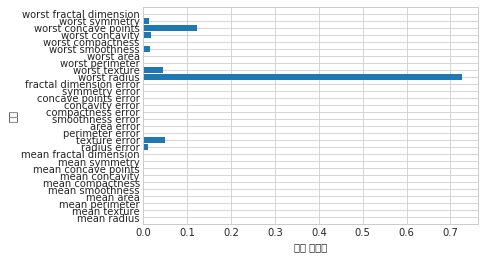

In [46]:
# 특성 중요도 시각화하기
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


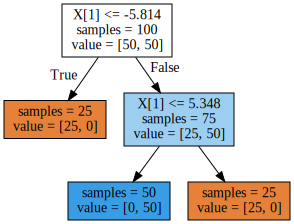

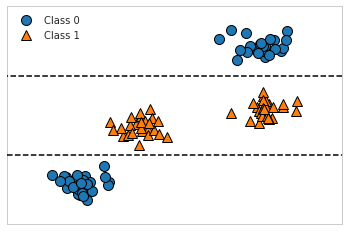

In [47]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

### 3-4. Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(forest.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


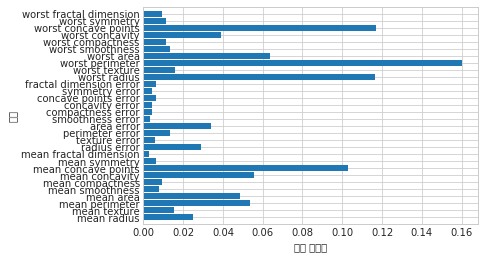

In [49]:
# 단일 트리에 비해 더 많은 특성 사용
plot_feature_importances_cancer(forest)

### 3-5. GradientBoosting

In [50]:
# 모델링 및 정확도 측정
## 훈련 세트에 100%로 과대적합 발생

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [51]:
# max_depth 매개변수

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [52]:
# 학습률 매개변수

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


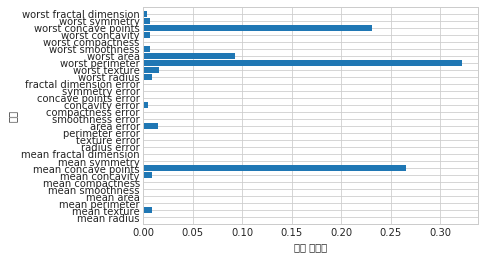

In [53]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

### 3-6. SVM 분류

In [54]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)
svc = SVC(C=1, gamma=.1)
svc.fit(X_train, y_train)

print('훈련 세트 정확도: {:.2f}'.format(svc.score(X_train, y_train)))
print('테스트 세트 정확도: {:.2f}'.format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


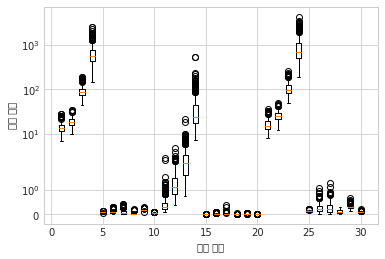

In [55]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale('symlog')
plt.xlabel('특성 목록')
plt.ylabel('특성 크기')
plt.show()

### 3-7. MLP

In [56]:
print('유방암 데이터의 특성별 최댓값:\n{}'.format(cancer['data'].max(axis=0)))

유방암 데이터의 특성별 최댓값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [57]:
# 정확도가 다른 모델에 비해서는 낮음
## 데이터 스케일을 표준화 
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(mlp.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.939
테스트 세트 정확도: 0.916


In [58]:
# z-score
## StandardScaler로 할 수 있지만 이번에는 직접 진행

# 훈련 세트 각 피처의 평균
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 피처의 표준 편차
std_on_train = X_train.std(axis=0)

# 훈련 세트 표준화
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 테스트 세트 표준화
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


In [59]:
# 반복 횟수 늘리기
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [60]:
# alpha 변수를 높혀 모델 복잡도 낮추기
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


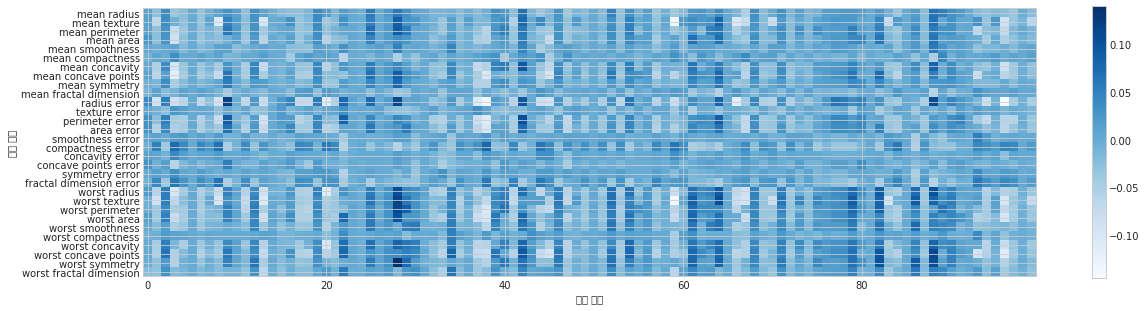

In [61]:
# 신경망이 어떻게 학습했는지 분석 (가중치를 확인)
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='Blues')
plt.yticks(range(30), cancer['feature_names'])
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
plt.colorbar()
plt.show()

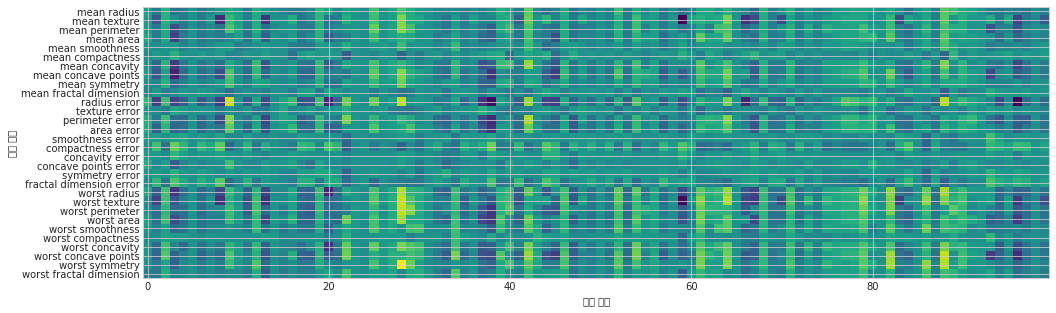

In [62]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer['feature_names'])
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
plt.show()

r# 4. 보스턴 주택가격 데이터셋 
* 70년대 보스턴 주변 주택 평균 가격 예측
    * 범죄율, 찰스강 인접도, 고속도로 접근성 등을 활용
    * 회귀 분석



### 4-1. 데이터셋 생성
* 특성 공학
    * 기존 피처를 통해 새로운 피처 유도

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [64]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [65]:
# 레코드, 피처 수
boston['data'].shape

(506, 13)

In [0]:
# 특성 공학 데이터 로드 
X, y = mglearn.datasets.load_extended_boston()

In [67]:
# 레코드, 피처 수
X.shape

(506, 104)

### 4-2. 단순 선형 회귀

In [0]:
# 선형 회귀 모델 피팅
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [69]:
# 피처가 많은 데이터에 단순한 모델을 적용
## 훈련 세트에는 잘 적용되지만, 오버피팅 일어났음
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


### 4-3. 릿지 회귀

* L2 규제
    * w의 값을 최소화

In [70]:
# 릿지 회귀 임포트 및 피팅
## 선형 회귀에 비해 과대적합이 적어짐
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [71]:
#ridge alpha값 조정
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [72]:
#ridge alpha값 조정
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


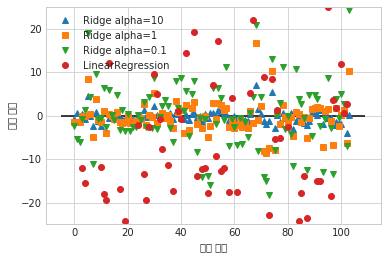

In [73]:
# alpha값에 따른 w값의 변화
## alpha값이 커질수록, w값 또한 0에 가까워짐
## alpha값이 작아질수록, LinearRegression과 비슷해짐
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.hlines(0, -5, len(lr.coef_)+5)
plt.ylim(-25,25)
plt.legend()
plt.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


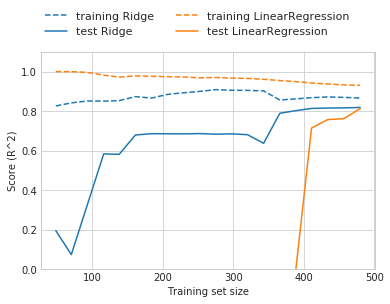

In [74]:
# 학습 곡선(learning curve) 나타내기
## 데이터가 많아지면, 규제의 의미가 옅어진다. (선형회귀와 릿지회귀의 차이가 줄어듦)
mglearn.plots.plot_ridge_n_samples()

### 4-4. 라쏘

In [75]:
# 100개가 넘는 피처 중 4개만 사용
# 과소적합 발생
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


In [76]:
# 알파값 낮춰서 모델 복잡도 증가, 성능 상승
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


In [77]:
# 알파값을 너무 낮추면 과대적합 발생, LinearRegression과 비슷한 결과 나옴
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 96


Text(0, 0.5, '계수 크기')

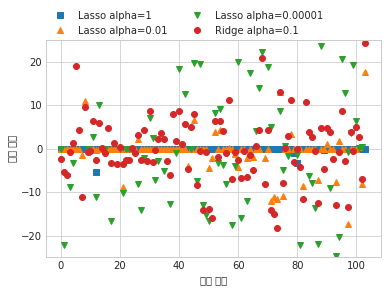

In [78]:
# 릿지와 라쏘의 가장 큰 차이점은 모델이 자동으로 피처를 탈락시키는지 여부
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.00001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0,1))
plt.ylim(-25,25)
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')

In [79]:
1

1

# 5. Blobs

### 5-1. 다중 클래스 로지스틱 회귀

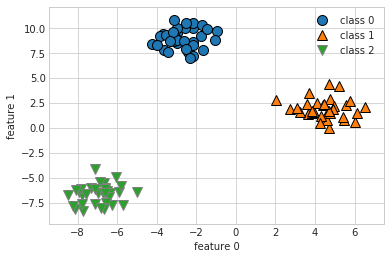

In [80]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2'])

In [81]:
linear_svm = LinearSVC().fit(X, y)
print('계수 배열의 크기: ', linear_svm.coef_.shape)
print('절편 배열의 크기: ', linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


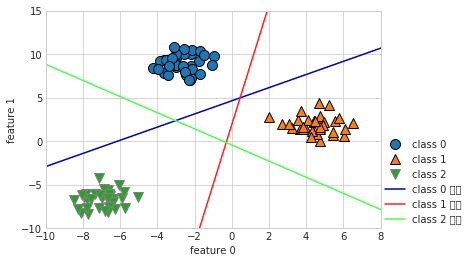

In [82]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 경계', 'class 1 경계','class 2 경계'], loc=(1,0))

Text(0, 0.5, 'feature 1')

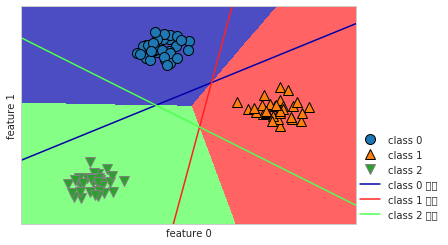

In [83]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept) / coef[1], c=color)
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 경계', 'class 1 경계','class 2 경계'], loc=(1,0))
plt.xlabel('feature 0')
plt.ylabel('feature 1')

### 5-2. SVM 선형모델과 비선형 특성

Text(0, 0.5, '특성 1')

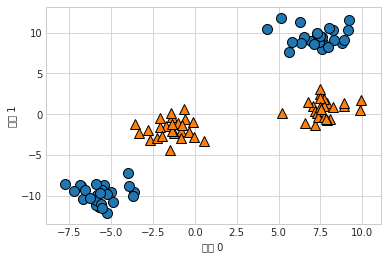

In [84]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

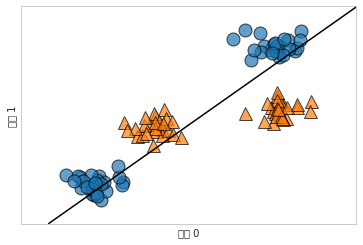

In [85]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y, s=13, alpha=.7)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0.5, 0, '특성1 **2')

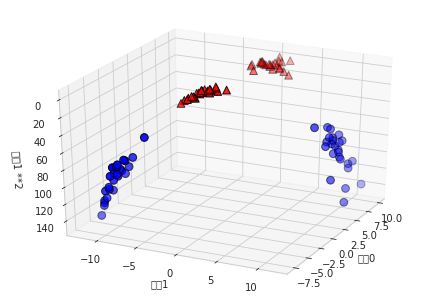

In [86]:
# 두 번째 특성을 제곱하여 추가
X_new = np.hstack([X, X[:, 1:]**2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 1인 포인트 그리기
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask,2], c='r', marker = '^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('특성0')
ax.set_ylabel('특성1')
ax.set_zlabel('특성1 **2')

Text(0.5, 0, '특성1 **2')

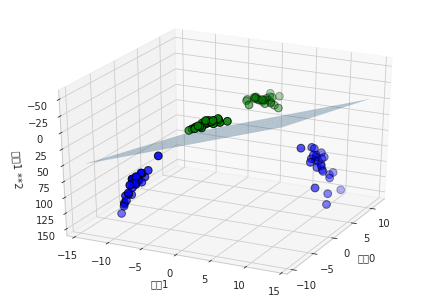

In [87]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max() +2, 50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max() +2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='g', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel('특성0')
ax.set_ylabel('특성1')
ax.set_zlabel('특성1 **2')

Text(0, 0.5, '특성 1')

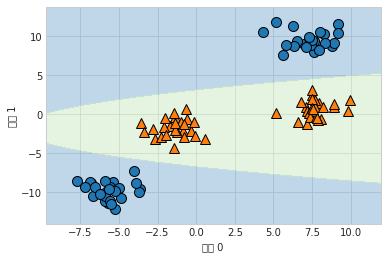

In [88]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap='Set3', alpha=.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

# 6. BernoulliNB

In [0]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [90]:
# 각 클래스 특성 중 0이 아닌 것이 몇 개인지 셈
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print('특성 카운트:\n{}'.format(counts))

특성 카운트:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


# 7. Decision Tree

### 7-1. 노드 시각화

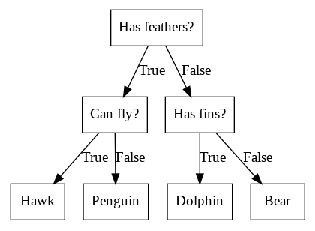

In [91]:
# 각 박스들: 노드
# 마지막 노드: 리프(leaf)
mglearn.plots.plot_animal_tree()

### 7-2. 회귀 트리

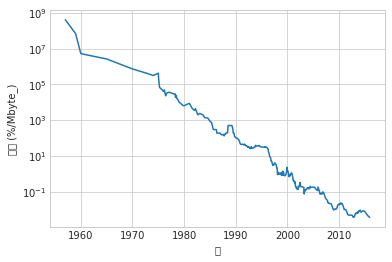

In [92]:
import os 
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.semilogy(ram_prices['date'], ram_prices['price'])
plt.xlabel('년')
plt.ylabel('가격 (%/Mbyte_)')
plt.show()

# 8. Two-moon

### 8-1. Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

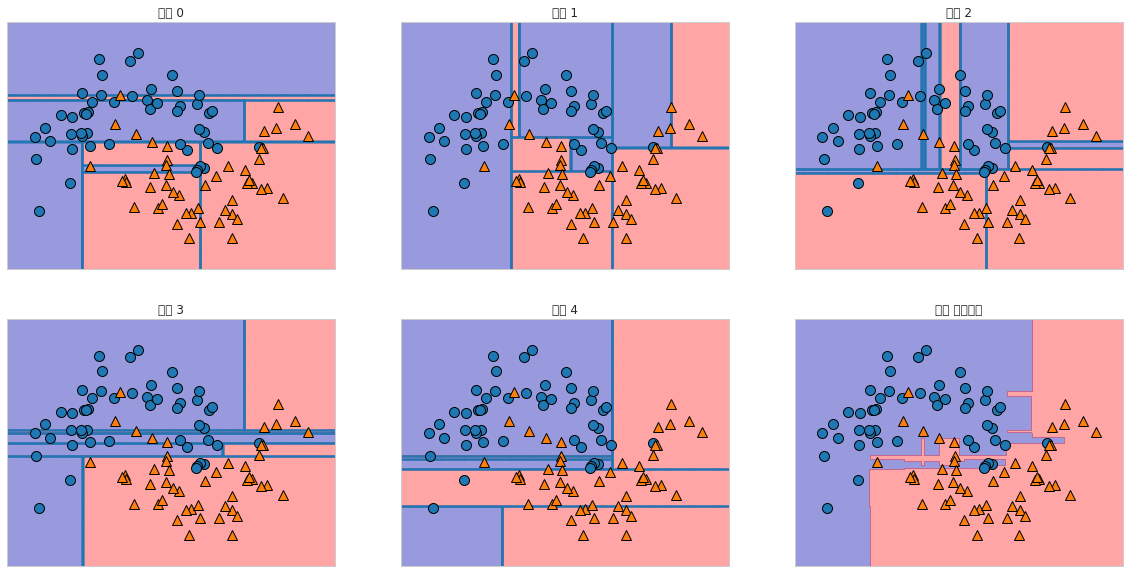

In [94]:
# 트리 시각화 
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1,-1].set_title('랜덤 포레스트')
mglearn.discrete_scatter(X[:,0], X[:,1], y)

### 8-2. MLP

Text(0, 0.5, '특성 1')

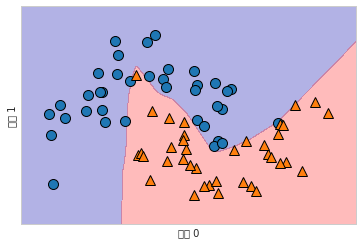

In [95]:
# MLP의 은닉유닛 기본값 100개

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

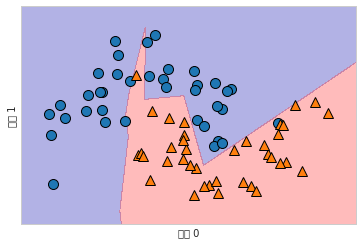

In [96]:
# 은닉 유닛 10개로 축소

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

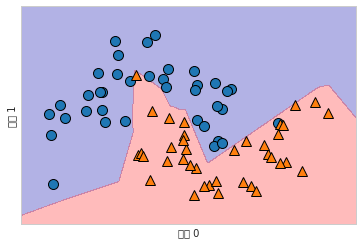

In [97]:
# 은닉 유닛은 10개, 은닉층 2개

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

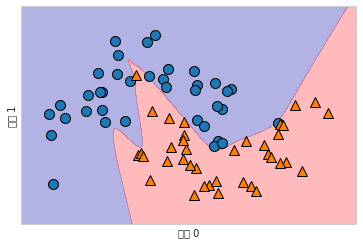

In [98]:
# 10 유닛 * 2개 은닉층 + tanh 활성화 함수

mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

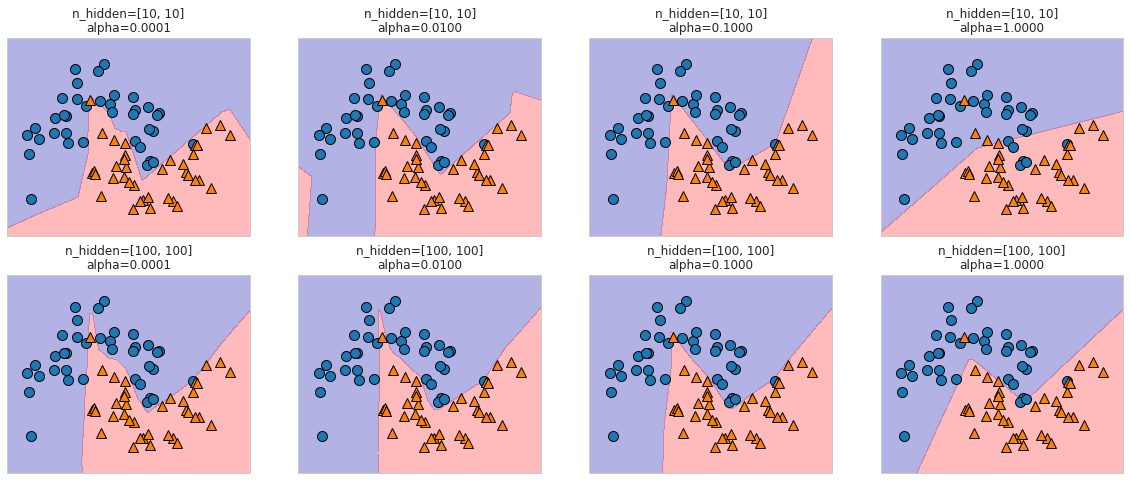

In [99]:
# [10, 100] 유닛 * 2개 은닉층 + [0.0001, 0.01, 0.1, 1] alpha 규제

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={:.4f}'.format(n_hidden_nodes, n_hidden_nodes, alpha))

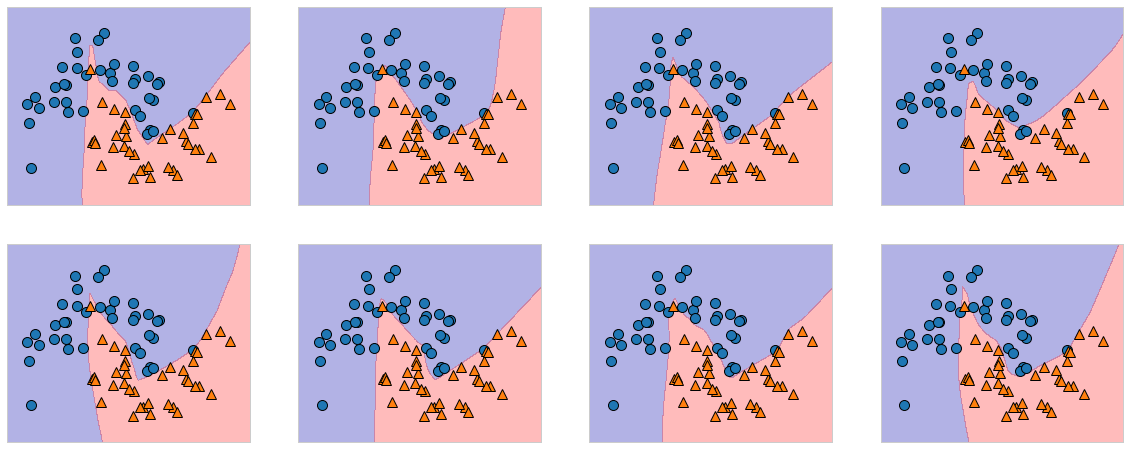

In [100]:
# 무작위의 초깃값의 값에 따라 모델이 달라짐 (매개변수가 동일하더라도)
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)

# 9. Deep learning

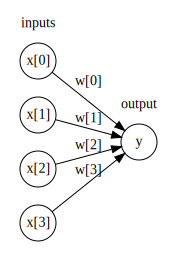

In [101]:
# 선형회귀 식을 시각화한 것
display(mglearn.plots.plot_logistic_regression_graph())

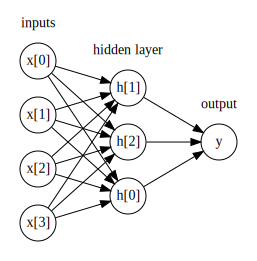

In [102]:
# 은닉층(hidden unit)이 1개인 MLP
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

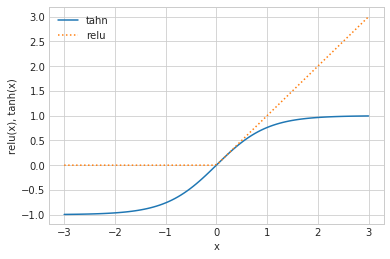

In [103]:
# 렐루와 tanh함수를 적용한 MLP
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tahn')
plt.plot(line, np.maximum(line,0), label='relu', ls=':')
plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

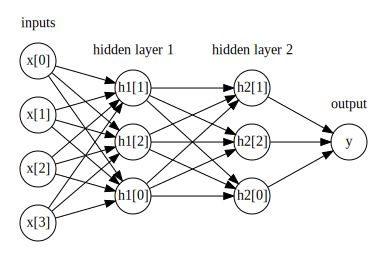

In [104]:
mglearn.plots.plot_two_hidden_layer_graph()

# 10. 분류 예측의 불확실성 추정

### 10-1. 결정 함수

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=.25, random_state=1)
y_named = np.array(['blue', 'red'])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [106]:
print('X_test.shape: {}'.format(X_test.shape))
print('결정 함수 결과 형태: {}'.format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [107]:
# 결정 함수의 부호만 보고 클래스 예측 가능 
## 양수: 양성 클래스(1) // 음수: 음성 클래스(0)
print("결정 함수: \n{}".format(gbrt.decision_function(X_test)[:6]))

결정 함수: 
[ 2.78489183 -1.70873323  0.75210488 -2.24818835 -1.39345947 -1.51541113]


In [108]:
print('임계치와 결정 함수 결과 비교: \n{}'.format(format(gbrt.decision_function(X_test) > 0)))
print('예측:\n{}'.format(gbrt.predict(X_test)))

임계치와 결정 함수 결과 비교: 
[ True False  True False False False False False False  True False  True
  True False False False False  True  True False  True False  True False
  True]
예측:
['red' 'blue' 'red' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'red' 'blue'
 'red' 'red' 'blue' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'blue'
 'red' 'blue' 'red']


In [129]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print('pred는 예측 결과와 같다: {}'.format(np.all(pred == gbrt.predict(X_test))))

pred는 예측 결과와 같다: True


In [113]:
decision_function = gbrt.decision_function(X_test)
print('결정 함수 최솟값: {:.2f} 최댓값: {:.2f}'.format(np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값: -2.54 최댓값: 2.78


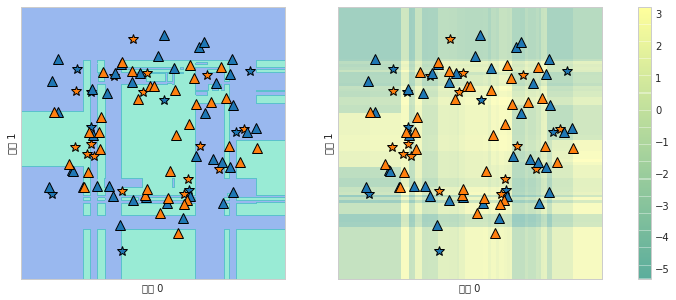

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm='winter')
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm='summer')
for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='*', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='^', ax=ax)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
cbar = plt.colorbar(scores_image, ax=axes.tolist())


### 10-2. 예측 확률

In [120]:
print('확률 값의 형태: {}'.format(gbrt.predict_proba(X_test).shape))

확률 값의 형태: (25, 2)


In [121]:
print('예측 확률:\n{}'.format(gbrt.predict_proba(X_test[:6])))

예측 확률:
[[0.05814607 0.94185393]
 [0.84667191 0.15332809]
 [0.32036283 0.67963717]
 [0.90449415 0.09550585]
 [0.80114395 0.19885605]
 [0.81986175 0.18013825]]


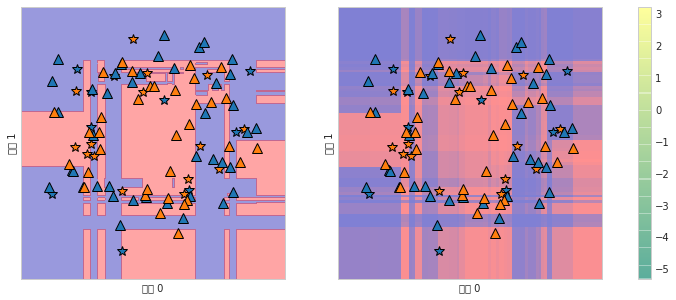

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='*', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='^', ax=ax)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
cbar = plt.colorbar(scores_image, ax=axes.tolist())

### 10-3. 다중 분류에서 불확실성

In [136]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [141]:
print('결정 함수의 결과 형태: {}'.format(gbrt.decision_function(X_test).shape))
# 일부만 조회
print('결정 함수 결과\n{}'.format(gbrt.decision_function(X_test)[:6,:]))

결정 함수의 결과 형태: (38, 3)
결정 함수 결과
[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In [147]:
iris['target_names'][gbrt.classes_]

array(['setosa', 'versicolor'], dtype='<U10')